In [5]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 138.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 154.3 MB/s eta 0:00:00


In [6]:
!pip install einops timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 13.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 47.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [8]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 142.4 MB/s eta 0:00:00


In [9]:
!pip install Pillow

In [11]:
!pip install matplotlib


In [10]:
# Load model directly
from transformers import AutoProcessor,AutoModelForCausalLM
from PIL import Image
import requests
import copy
%matplotlib inline


In [12]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

In [13]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text, 
        task=task_prompt, 
        image_size=(image.width, image.height)
    )

    return parsed_answer

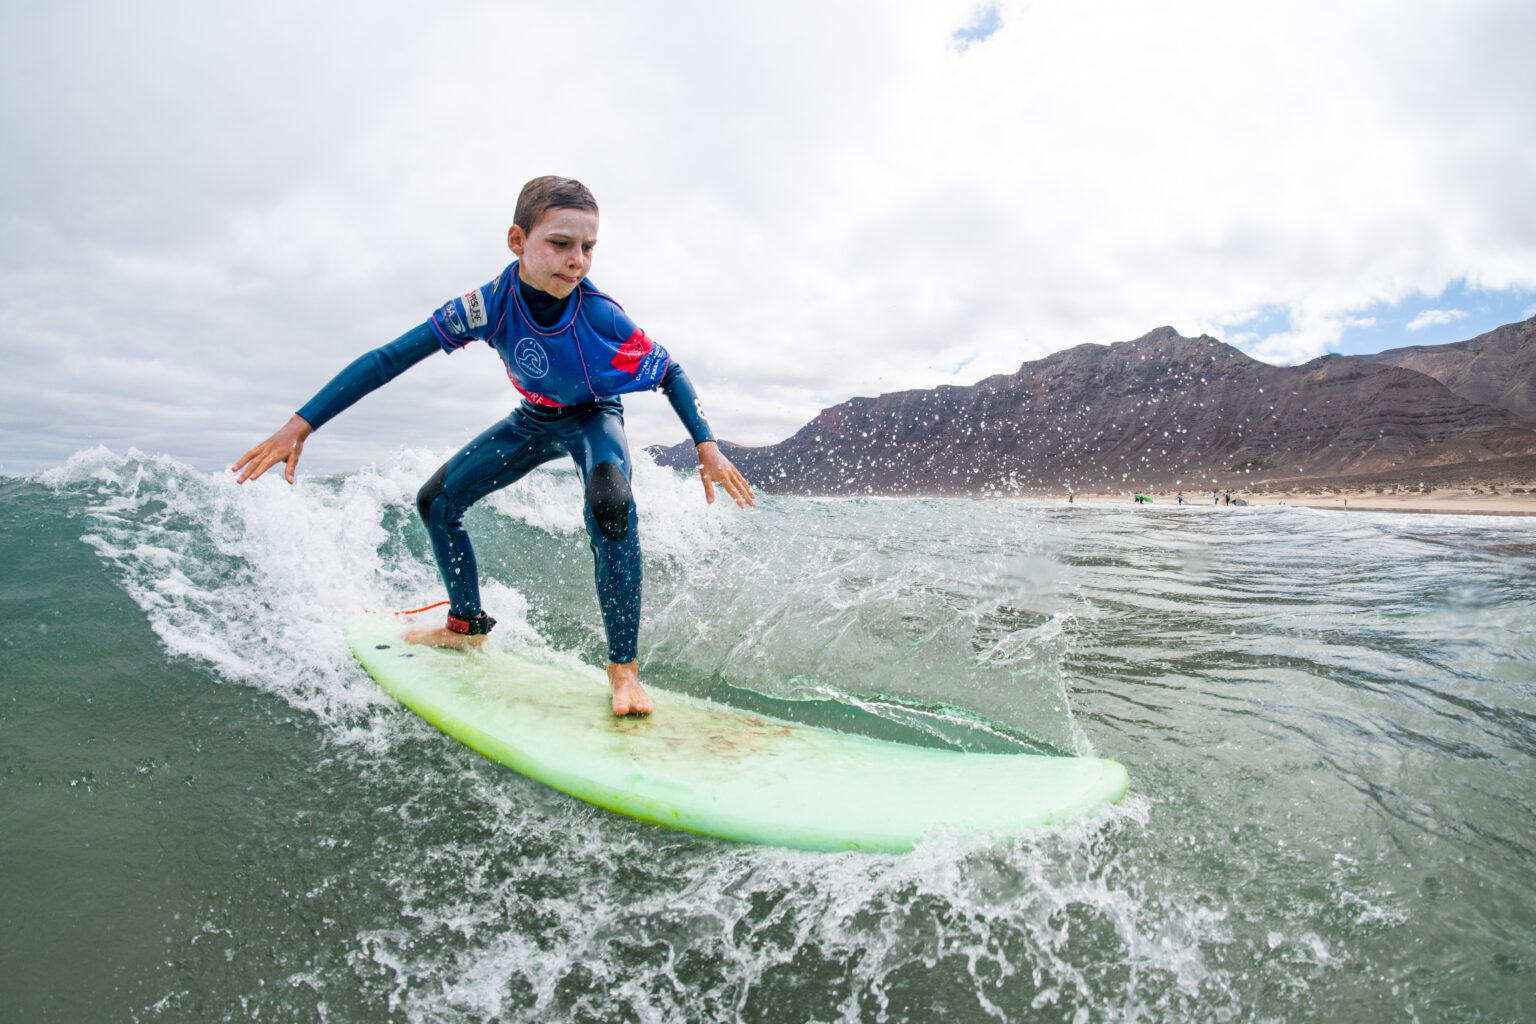

In [14]:
url = "https://lanzasurf.com/wp-content/uploads/2023/10/Lanzasurf-Surf-Yoga-Camps-Beginner-to-Intermediate-Surfer-2-1536x1024.jpeg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [15]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

{'<CAPTION>': 'A young boy riding a wave on top of a surfboard.'}

In [16]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

{'<DETAILED_CAPTION>': 'The image shows a young boy riding a wave on top of a green surfboard, wearing a blue and red wetsuit. In the background, there are a few people, mountains, and a clear blue sky.'}

In [17]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[237.31199645996094, 174.59201049804688, 761.0880126953125, 719.3600463867188], [338.68798828125, 603.6480102539062, 1137.407958984375, 857.6000366210938]], 'labels': ['person', 'surfboard']}}


In [18]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches  
def plot_bbox(image, data):
   # Create a figure and axes  
    fig, ax = plt.subplots()  
      
    # Display the image  
    ax.imshow(image)  
      
    # Plot each bounding box  
    for bbox, label in zip(data['bboxes'], data['labels']):  
        # Unpack the bounding box coordinates  
        x1, y1, x2, y2 = bbox  
        # Create a Rectangle patch  
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')  
        # Add the rectangle to the Axes  
        ax.add_patch(rect)  
        # Annotate the label  
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))  
      
    # Remove the axis ticks and labels  
    ax.axis('off')  
      
    # Show the plot  
    plt.show()  

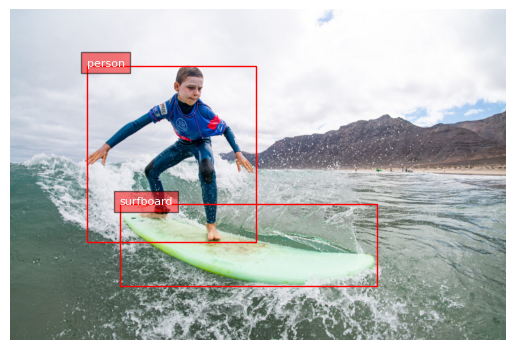

In [19]:
plot_bbox(image, results['<OD>'])

In [34]:
model.save_pretrained("./florence2_model")
processor.save_pretrained("./florence2_model")

[]

start working with s3

In [37]:
bucket='projectimgcapbucket'

In [35]:
import tarfile

def create_tar_gz(source_dir, output_filename):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=".")

# Package the model into a .tar.gz file
create_tar_gz("./florence2_model", "florence2.tar.gz")


In [39]:
import boto3

s3_client = boto3.client('s3')
s3_client.upload_file('florence2.tar.gz', bucket, 'florence2.tar.gz')


In [38]:
import boto3

s3_client = boto3.client('s3')

def upload_to_s3(file_name, bucket, object_name=None):
    if object_name is None:
        object_name = file_name
    s3_client.upload_file(file_name, bucket, object_name)
    print(f"File uploaded to s3://{bucket}/{object_name}")

# Example usage
upload_to_s3('surf.jpg', bucket,'images/surf.jpg')

File uploaded to s3://projectimgcapbucket/images/surf.jpg


model hosting on sagemaker

In [40]:
import sagemaker
from sagemaker.huggingface import HuggingFaceModel
role = sagemaker.get_execution_role()
# Load Florence-2 model from Hugging Face (Assuming available)
huggingface_model = HuggingFaceModel(
    model_data='s3://projectimgcapbucket/florence2.tar.gz',  # Florence-2 model in S3
    role=role,
    transformers_version="4.12",
    pytorch_version="1.9",
    py_version="py38",
)

# Deploy the model on an endpoint
predictor = huggingface_model.deploy(
    initial_instance_count=1,
    instance_type="ml.m5.large"
)


--------!

model pipeline

In [43]:
import torch
from transformers import FlorenceModel, FlorenceProcessor
from PIL import Image

def model_fn(model_dir):
    # Load Florence-2 model
    model = FlorenceModel.from_pretrained(model_dir)
    processor = FlorenceProcessor.from_pretrained(model_dir)
    return model, processor

def predict_fn(input_data, model_and_processor):
    model, processor = model_and_processor
    
    # Preprocess the image
    image = Image.open(input_data['image_path']).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    
    # Generate predictions
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    predicted_tags = processor.decode(logits_per_image)
    
    return {"tags": predicted_tags}


MLflow on SageMaker

In [ ]:
import mlflow
import mlflow.sagemaker

# Start MLflow Run
mlflow.start_run()

# Log SageMaker model endpoint
mlflow.sagemaker.log_model(model, "model_sagemaker_endpoint", registered_model_name="Florence2")

# Log example metric (e.g., accuracy of tagging)
mlflow.log_metric("accuracy", 0.95)

mlflow.end_run()
